### 0. Import Libraries and Set Up Connections

In [1]:
import pandas as pd
import numpy as np
import psycopg2

In [2]:
conn = psycopg2.connect("host=127.0.0.1 dbname=sparkifydb user=student password=student")
cur = conn.cursor()

In [3]:
sql = """select distinct s.songplay_id,s.start_time,s.level,so.title as song_title
,so.year as song_year, so.duration,s.session_id,a.name as artist_name,s.location
,s.user_agent,a.latitude,a.longitude,t.hour,t.day,t.week,t.month,t.year,t.weekday from songplays s
left join users u on u.user_id = s.user_id
left join songs so on so.song_id = s.song_id
left join artists a on a.artist_id = s.artist_id
left join time t on t.start_time = s.start_time
"""

In [4]:
df = pd.read_sql(sql,conn)

In [5]:
from datetime import datetime
df['start_time']=df['start_time'].apply(lambda x:datetime.strptime(x,'%Y-%m-%d %H:%M:%S'))

In [6]:
df.head(1)

,songplay_id,start_time,level,song_title,song_year,duration,session_id,artist_name,location,user_agent,latitude,longitude,hour,day,week,month,year,weekday
0,1,2018-11-30 00:22:07,free,None,NaN,NaN,829,None,"Dallas-Fort Worth-Arlington, TX",Mozilla/5.0 (compatible; MSIE 10.0; Windows NT...,NaN,NaN,0,30,48,11,2018,4


### 1. Exploratory Analysis

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

##### Since most of the songs are not stored in the DB, we do not have the duration information for the logged activities. Instead, we look at the count of the songs the users listened to to gain some insights.

#### 1.1 Songs listened across weekdays in a week

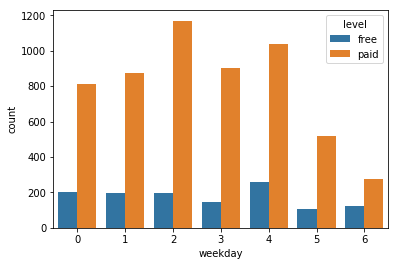

In [8]:
sns.countplot(data=df,x='weekday',hue='level')

##### Looks like people listened more songs on Tuesday and Thursday than other days in a week. Paid users are much more than Free users

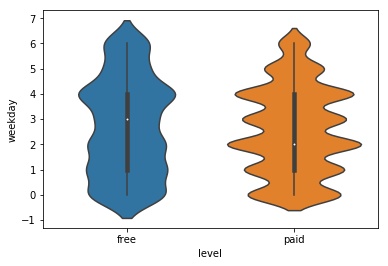

In [9]:
sns.violinplot(data=df,x='level',y='weekday')

##### Paid users have more erratic behaviour than free users based on different day of the week, whereas free users does not seem to be good candidate for this type of analysis since the curve is too smooth, which means the difference across different days is not very significant.

#### 1.2. By Hour

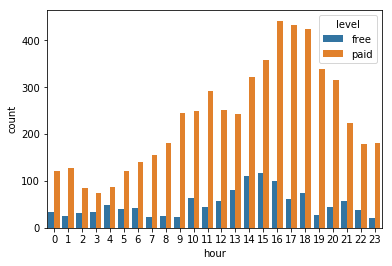

In [10]:
sns.countplot(data=df,x='hour',hue='level')

##### Apparently, people tend to listen to music more in between the afternoon and the evening

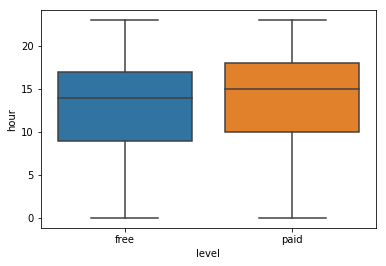

In [11]:
sns.boxplot(data=df,x='level',y='hour')

##### Free users and paid users are having similar listening behaviours, but the free users shifted a little bit to an earlier time than paid users

#### 1.3. By State

In [12]:
df['state'] = df['location'].apply(lambda x: x.split(',')[-1].strip())

In [13]:
order = df['state'].value_counts().index.tolist()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35]), <a list of 36 Text xticklabel objects>)

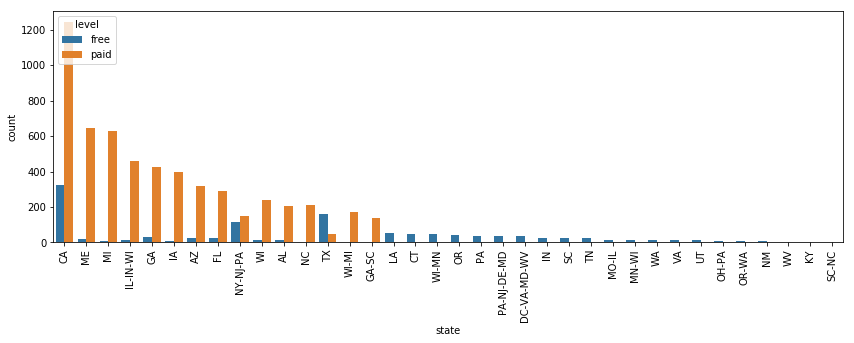

In [14]:
plt.figure(figsize=(12,4))
sns.countplot(data=df,x='state',hue='level',order = order)
plt.tight_layout()
plt.xticks(fontsize=10, rotation=90)

##### Looks like there are some data needs to be cleaned. Other than that, some States are having more free users than paid users, which can be set as target States since the larger base of free users is more worthwhile to take effort to transfer to paid users. Still, condition may apply. Hence, experiment design will be required for testing the market first.

#### 1.4. By user_agent

In [15]:
agent_order = df['user_agent'].value_counts().index.tolist()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39]), <a list of 40 Text xticklabel objects>)

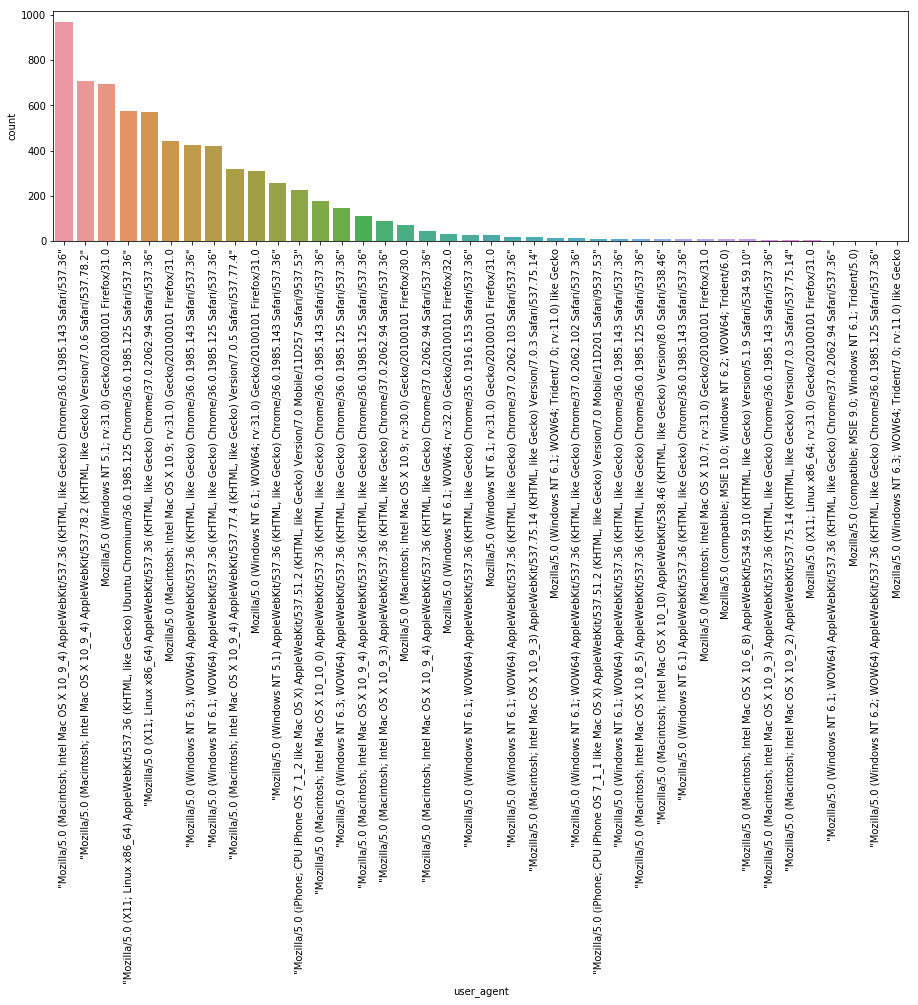

In [16]:
plt.figure(figsize=(20,4))
sns.countplot(data=df,x='user_agent',order = agent_order)
plt.tight_layout()
plt.xticks(fontsize=10, rotation=90)

##### Need to further parse the agent data into more detailed partitions